In [45]:
from scipy.stats import kurtosis,skew
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [46]:
height=[60,62,65,68,70,74]
weight=[140,138,150,166,190,250]

In [47]:
np.corrcoef(height,weight) #это типо как heap map корреляция 

array([[1.        , 0.92989745],
       [0.92989745, 1.        ]])

<Axes: >

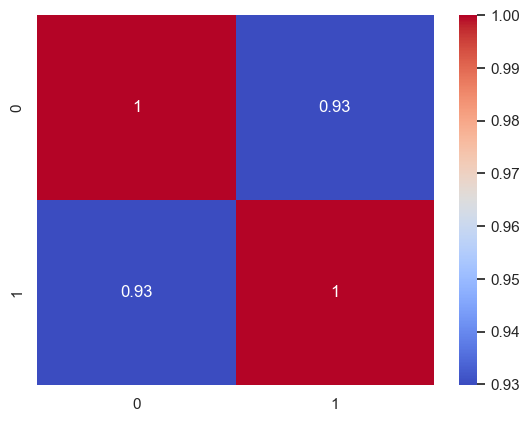

In [48]:
sns.heatmap(np.corrcoef(height,weight), annot=True, cmap='coolwarm')

In [49]:


df=pd.read_csv('insurance.csv')
df.head(2)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [50]:
df.drop(['sex','smoker','region'],axis=1).corr() #выводим матрицу корреляции

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

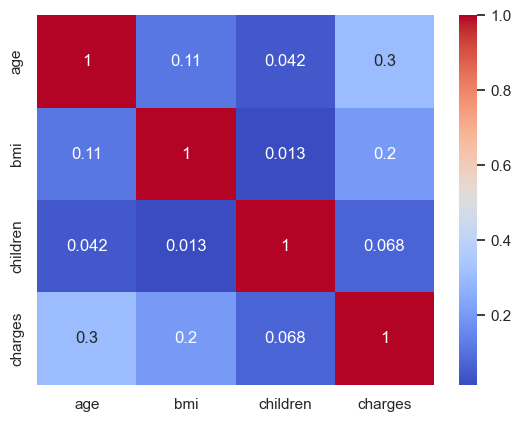

In [51]:
sns.heatmap(df.drop(['sex','smoker','region'],axis=1).corr(), annot=True, cmap='coolwarm')

In [52]:
corr=stats.pearsonr(df.charges,df.age)
r,p=stats.pearsonr(df.charges,df.age)


In [53]:
corr #посмотреть потом что это значит

PearsonRResult(statistic=0.2990081933306475, pvalue=4.886693331718505e-29)

In [54]:
coff_df=pd.DataFrame(columns=['r','p'])

for col in df.drop(['sex','smoker','region'],axis=1):
    r,p=stats.pearsonr(df.charges,df[col])
    coff_df.loc[col]=[round(r,3),round(p,3)]


In [55]:
coff_df

,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013
charges,1.000,0.000


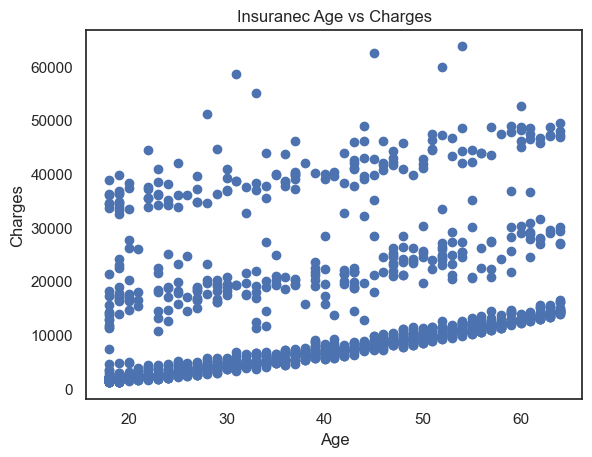

In [56]:
plt.scatter(df.age,df.charges)
plt.title('Insuranec Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.show()

In [57]:
df_smoker=df[df['smoker']=='yes']
df_non_smoker=df[df['smoker']=='no']


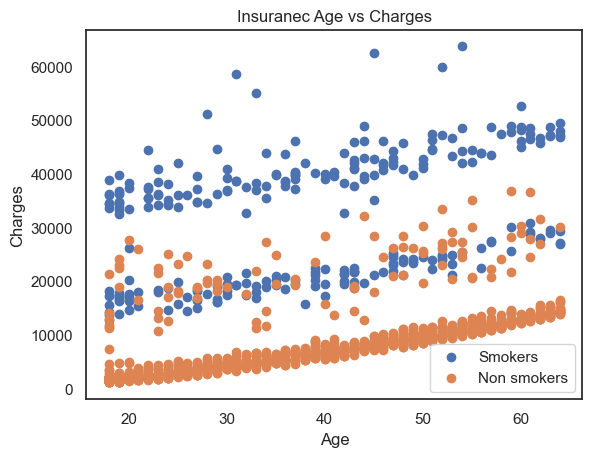

In [58]:
plt.scatter(df_smoker.age,df_smoker.charges,label='Smokers') #label нужен для legend
plt.scatter(df_non_smoker.age,df_non_smoker.charges,label='Non smokers')

plt.title('Insuranec Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

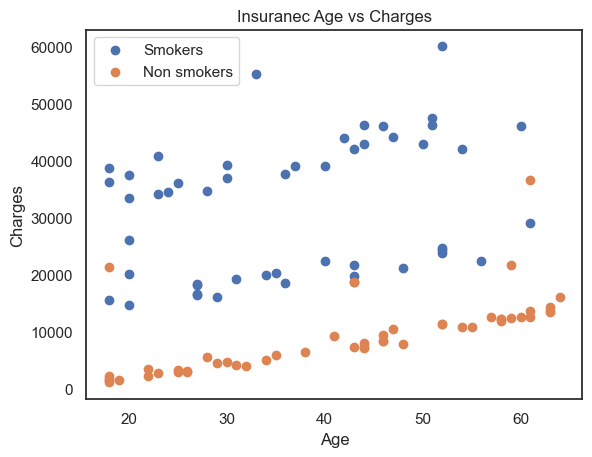

In [59]:
df_smoker_reduced=df_smoker.sample(50) # random selection of 50 variables
df_non_smoker_reduced=df_non_smoker.sample(50)


plt.scatter(df_smoker_reduced.age,df_smoker_reduced.charges,label='Smokers')
plt.scatter(df_non_smoker_reduced.age,df_non_smoker_reduced.charges,label='Non smokers')

plt.title('Insuranec Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

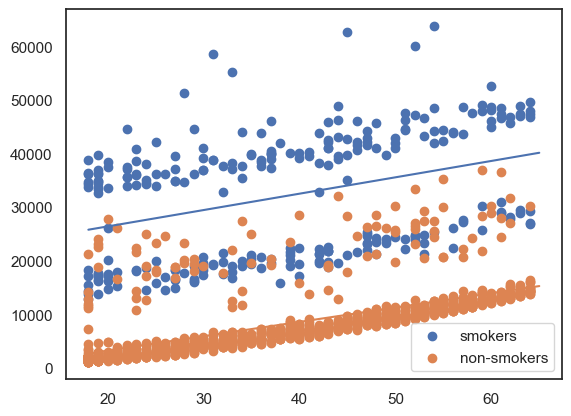

In [74]:
""" m,b,r,p,err=stats.linregress(df.age,df.charges)

x=range(18,66)
y=m*x+b
plt.plot(x,y,color='red') 

plt.scatter(df.age,df.charges)
plt.title('Insuranec Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.show() """

a=df.where(df['smoker'] == 'yes')
a=a.dropna()
b=df.where(df['smoker'] != 'yes')
b=b.dropna()

x=range(18,66)
ma,ba,ra,pa,erra=stats.linregress(a.age,a.charges)
ya=ma*x+ba

mb,bb,rb,pb,errb=stats.linregress(b.age,b.charges)
yb=mb*x+bb

plt.plot(x,ya)
plt.plot(x,yb)

plt.scatter(a.age,a.charges,label='smokers')
plt.scatter(b.age,b.charges,label='non-smokers')

plt.legend()
plt.show()



In [61]:
#сейчас будеt гетероскедастичность

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols


model=ols(formula='charges~age',data=df).fit()


white_test=het_white(model.resid,model.model.exog)
breuschpagan_test=het_breuschpagan(model.resid,model.model.exog)



In [62]:
output_df=pd.DataFrame(columns=['LM stat','LM p','F stat','F stat p'])
output_df.loc['white']=white_test
output_df.loc['breuschpagan']=breuschpagan_test

output_df

,LM stat,LM p,F stat,F stat p
white,0.002713,0.998645,0.001353,0.998648
breuschpagan,0.000413,0.983776,0.000413,0.983792


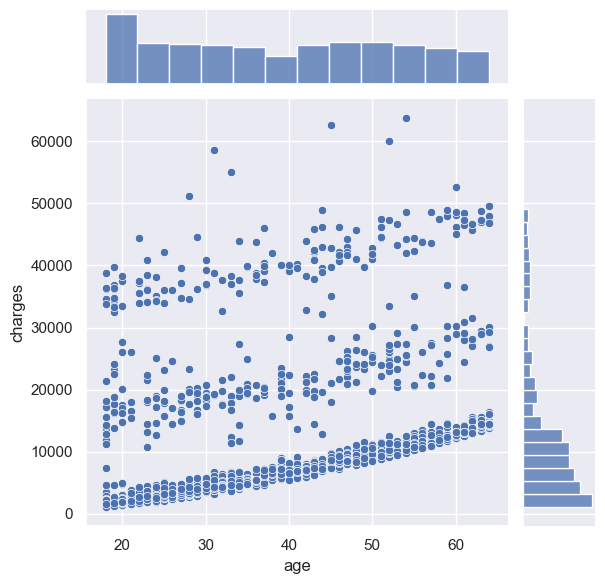

In [63]:
sns.set(color_codes=True)

sns.jointplot(x='age',y='charges',data=df)  
plt.show() #чтобы не выводилась сверху херня(или после предыдущей
#строчки можно поставить ; в конце и она тоже не будет выводиться)

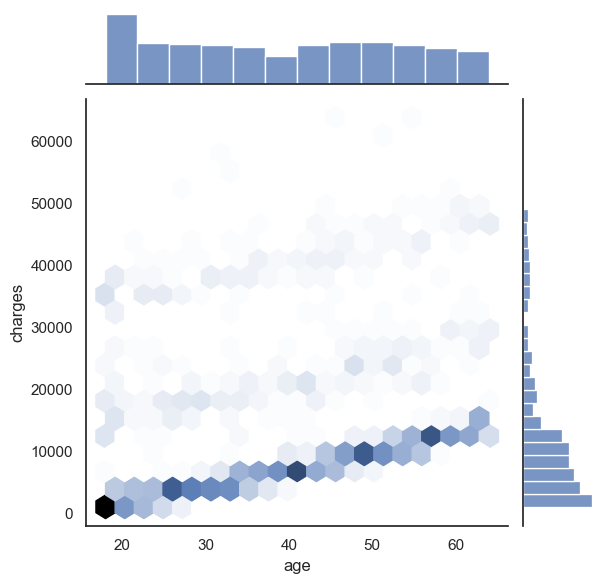

In [64]:
sns.set_style('white')
sns.jointplot(x='age',y='charges',data=df, kind='hex');
#видим как хорошо они сконцетрированы


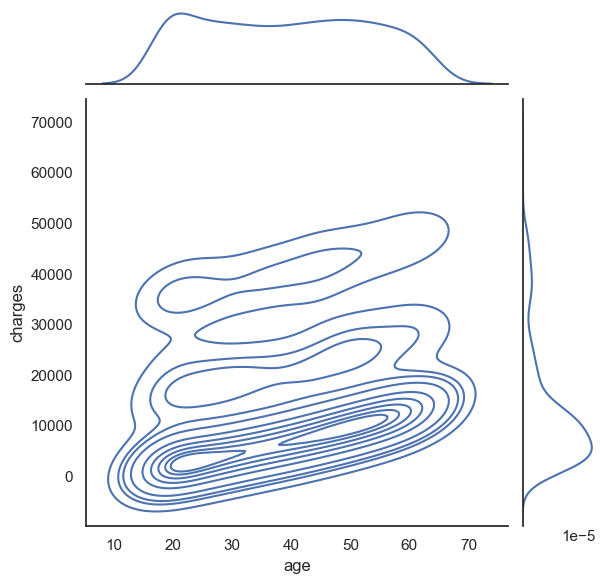

In [65]:
sns.jointplot(x='age',y='charges',data=df, kind='kde');


c:\Users\vladt\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



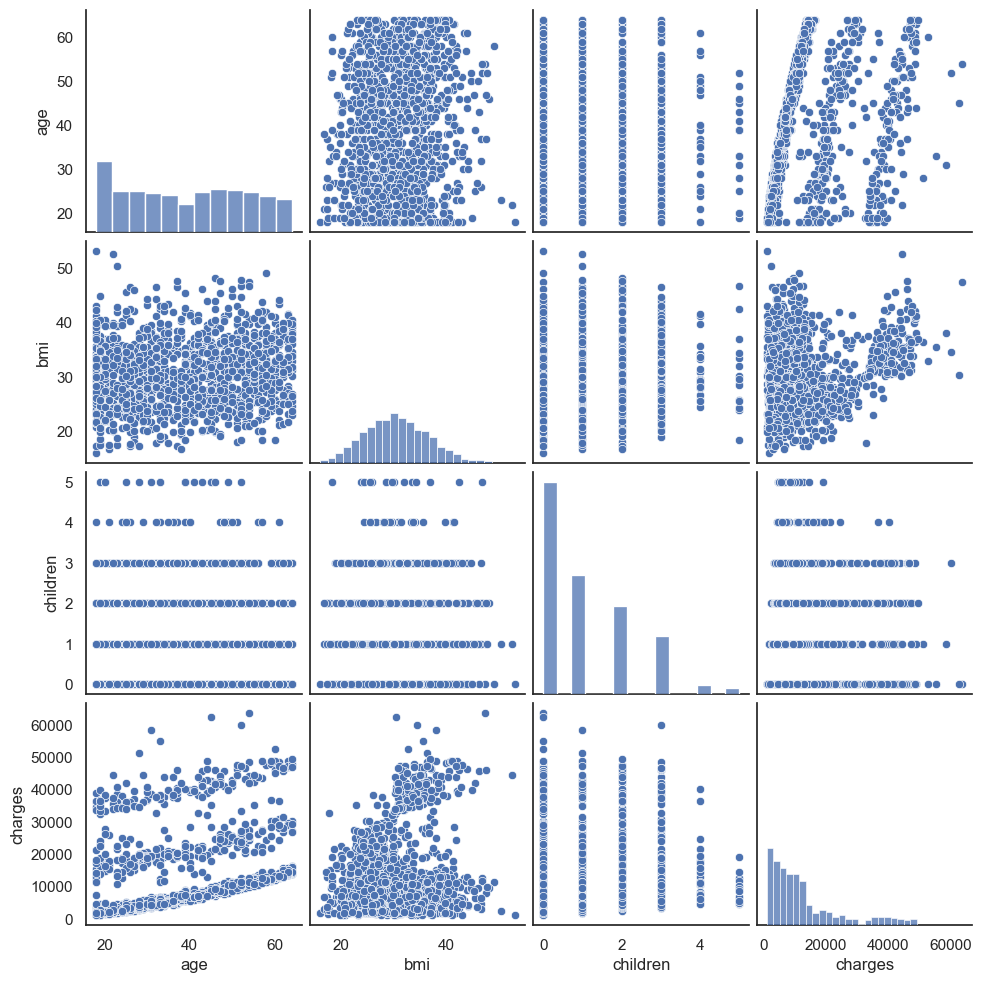

In [66]:
df.dropna(inplace=True)
sns.pairplot(df);

In [67]:
import plotly.express as px

fig=px.scatter_3d(df,x='age',y='charges',z='bmi')
fig.show()